<a href="https://colab.research.google.com/github/Factorito/AIportplio/blob/main/Tensorflow_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolution network

In [1]:
import tensorflow as tf
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2),padding='valid',filters=16)

# kernel_size: filter's matrix size(receptive filed) (3= height,3 = width )
#strides : the size of every filter's single step in calcluate process, basic value : (1,1), (2,2) -> calculate by skipping one block
#padding : designating option around the input image before calculation,
#same : input emtpy value to deserve the image's size , valid : no use empty value
#filters : filetr's count


In [2]:
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))
#pool size : max calculation size, (2,2) : in 2x2 sqaure


In [3]:
pool1 = tf.keras.layers.Dropout(rate=0.3)


In [18]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X/255.0
test_X = test_X/255.0


In [15]:
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

print(train_X.shape,test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


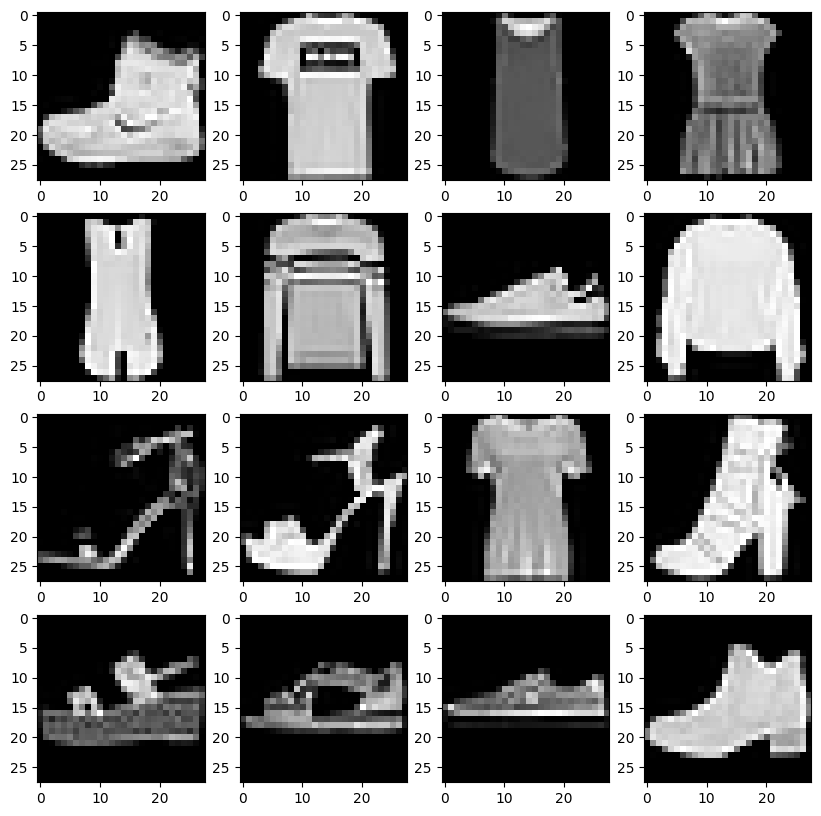

[0.03529412 0.         0.         ... 0.01176471 0.         0.01960784]


In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for c in range(16):
  plt.subplot(4,4,c+1)

  plt.imshow(train_X[c].reshape(28,28),cmap='gray')

plt.show()

print(train_Y)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape =(28,28,1), kernel_size = (3,3), filters= 16),
     tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 32),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')

])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,642 (15.22 MB)

 Trainable params: 3,989,642 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1009 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 2/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1009 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 3/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1013 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 4/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1036 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 5/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0977 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 6/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0993 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 7/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0988 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 8/25
1407/1407 ━━━━━━━━━━━━

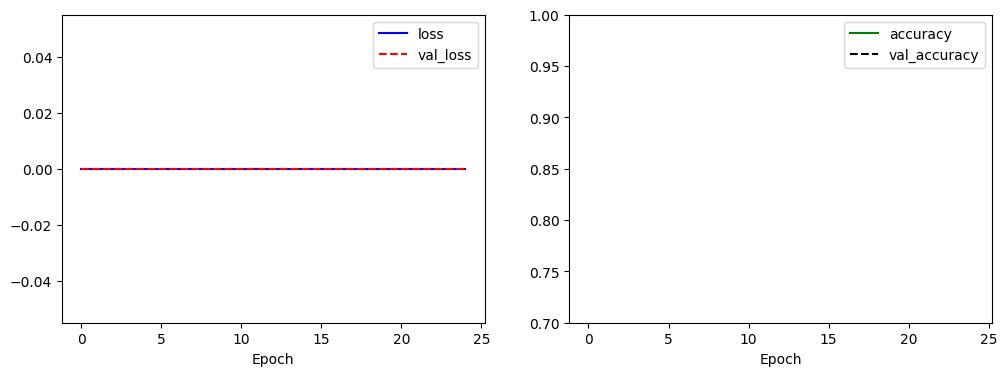

[45073.8984375, 0.10000000149011612]

In [10]:
history = model.fit(train_X,train_Y,epochs=25,validation_split=0.25)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X,test_Y,verbose=0)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape =(28,28,1), kernel_size = (3,3), filters= 32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
     tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10,activation='softmax')

])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1011 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 2/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1002 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 3/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.0993 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 4/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0990 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 5/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0975 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 6/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1005 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 7/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0995 - loss: 0.0000e+00 - val_accuracy: 0.1009 - val_loss: 0.0000e+00
Epoch 8/25
1407/1407 ━━━━━━━━━━

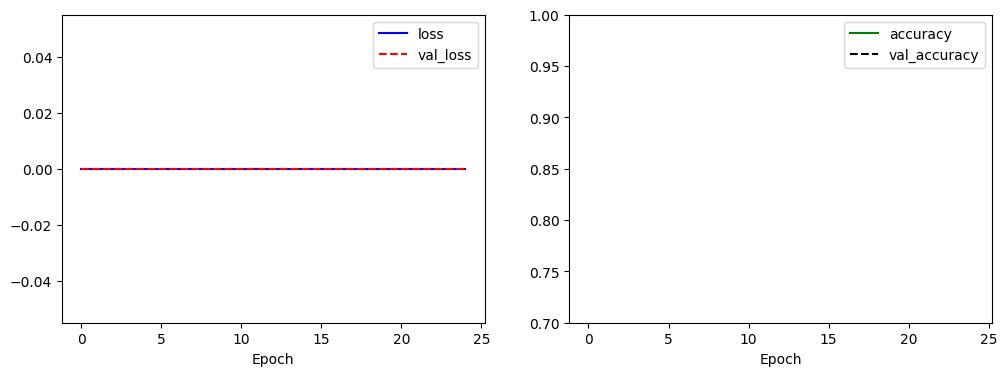

[35455.91796875, 0.10000000149011612]

In [13]:
history = model.fit(train_X,train_Y,epochs=25,validation_split=0.25)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X,test_Y,verbose=0)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape =(28,28,1), kernel_size = (3,3), filters= 32,padding='same',activation = 'relu'),
     tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 64,padding='same',activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 128,padding='same',activation = 'relu'),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 256,padding='valid',activation = 'relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10,activation='softmax')

])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,240,842 (19.99 MB)

 Trainable params: 5,240,842 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.4981 - loss: 15.8397 - val_accuracy: 0.7719 - val_loss: 0.6353
Epoch 2/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7195 - loss: 0.7351 - val_accuracy: 0.7915 - val_loss: 0.5711
Epoch 3/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7460 - loss: 0.6721 - val_accuracy: 0.7943 - val_loss: 0.5628
Epoch 4/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7593 - loss: 0.6432 - val_accuracy: 0.8089 - val_loss: 0.5202
Epoch 5/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7728 - loss: 0.6037 - val_accuracy: 0.8051 - val_loss: 0.5026
Epoch 6/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7796 - loss: 0.5893 - val_accuracy: 0.8129 - val_loss: 0.4956
Epoch 7/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7925 - loss: 0.5526 - val_accuracy: 0.8140 - val_loss: 0.4777
Epoch 8/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7984 - loss:

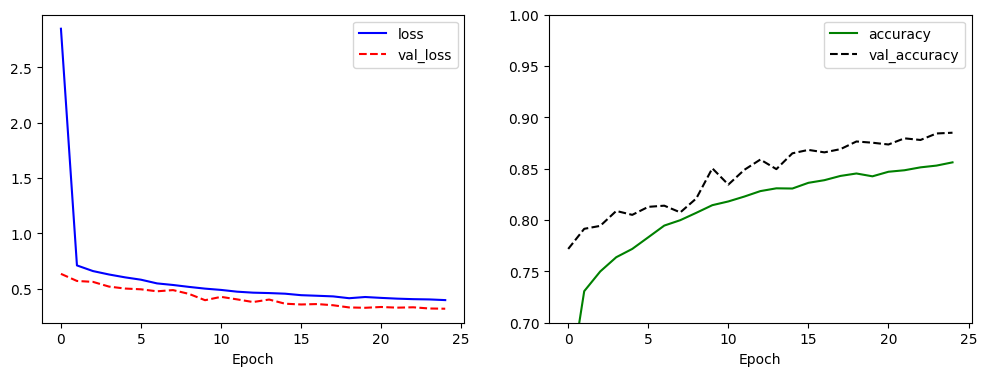

[0.3351762294769287, 0.8802000284194946]

In [19]:
history = model.fit(train_X,train_Y,epochs=25,validation_split=0.25)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X,test_Y,verbose=0)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range =0.10,
    height_shift_range= 0.10,
    horizontal_flip=True,
    vertical_flip=False
    )
augment_szie =100

x_augment = image_generator.flow(np.tile(train_X[0],(augment_szie,1,1,1)),np.zeros(augment_szie),batch_size=augment_szie,shuffle=False).__next__()[0]

/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:619: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (100, 1, 28, 28) (28 channels).
  warnings.warn(


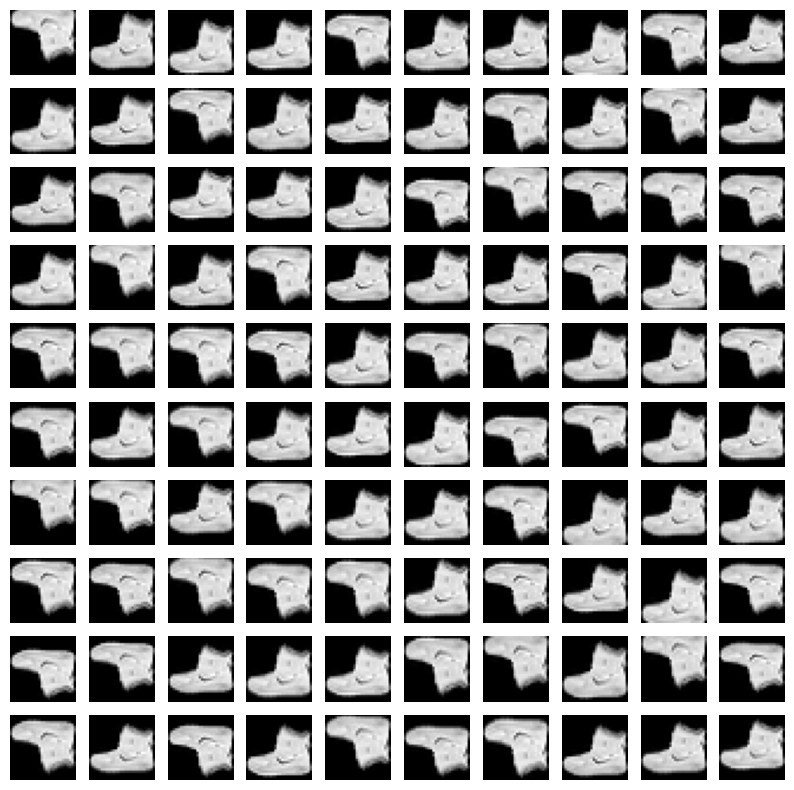

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for c in range(100):
  plt.subplot(10,10,c+1)
  plt.axis('off')
  plt.imshow(x_augment[c].reshape(28,28),cmap='gray')

plt.show()

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range =0.10,
    height_shift_range= 0.10,
    horizontal_flip=True,
    vertical_flip=False
    )
augment_size =3000

radnix = np.random.randint(train_X.shape[0],size=augment_size)
x_augment = train_X[radnix].copy()
y_augment = train_Y[radnix].copy()
# Ensure x_augment has 4 dimensions (batch_size, height, width, channels)
x_augment = x_augment.reshape(-1, 28, 28, 1)
x_augment = image_generator.flow(x_augment,np.zeros(augment_size),batch_size=augment_size,shuffle=False).__next__()[0]

# Ensure train_X has 4 dimensions before concatenation
train_X = train_X.reshape(-1, 28, 28, 1)

x_augment = np.concatenate((train_X,x_augment))
y_augment = np.concatenate((train_Y,y_augment))

print(train_X.shape)

(60000, 28, 28, 1)


In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape =(28,28,1), kernel_size = (3,3), filters= 32,padding='same',activation = 'relu'),
     tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 64,padding='same',activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 128,padding='same',activation = 'relu'),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters= 256,padding='valid',activation = 'relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10,activation='softmax')

])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,240,842 (19.99 MB)

 Trainable params: 5,240,842 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_X,train_Y,epochs=25,validation_split=0.25)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()

plt.show()

model.evaluate(test_X,test_Y,verbose=0)

Epoch 1/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.6917 - loss: 0.8541 - val_accuracy: 0.8869 - val_loss: 0.3119
Epoch 2/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8628 - loss: 0.3809 - val_accuracy: 0.9030 - val_loss: 0.2647
Epoch 3/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8820 - loss: 0.3254 - val_accuracy: 0.9057 - val_loss: 0.2509
Epoch 4/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8898 - loss: 0.3014 - val_accuracy: 0.9111 - val_loss: 0.2431
Epoch 5/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8959 - loss: 0.2908 - val_accuracy: 0.9169 - val_loss: 0.2268
Epoch 6/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9024 - loss: 0.2777 - val_accuracy: 0.9143 - val_loss: 0.2366
Epoch 7/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9103 - loss: 0.2548 - val_accuracy: 0.9157 - val_loss: 0.2359
Epoch 8/25
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9091 - loss: 